# Model Saving & Loading

- Model의 Architecture 저장 : JSON, YAML (Method `model.to_yaml()` has been removed due to security risk of arbitrary code execution. Please use `model.to_json()` instead.)
- Model의 Weight 저장 : H5 File Format
- HDF5(Hierarchical Data Format version 5, Extension= h5)는 대용량 데이터를 저장하기 위한 파일 포맷 -> `.keras` 확장자로 저장 권장

## 테스트용 Model 생성

### 필요 라이브러리 로드

In [18]:
import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
tf.__version__

'2.13.0'

### 데이터 로드

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
print([x.shape for x in [x_train, y_train, x_test, y_test]])

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]


### 데이터 전처리

In [6]:
x_train = x_train / 255.0
x_trest = x_test / 255.0

In [7]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [8]:
print([x.shape for x in [x_train, y_train, x_test, y_test]])

[(60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,)]


In [9]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
print([x.shape for x in [x_train, y_train, x_test, y_test]])

[(60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10)]


### 모델링

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, padding='same', input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, padding='valid', activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=120, activation='relu'),
    tf.keras.layers.Dense(units=84, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 모델 학습

In [14]:
history = model.fit(x_train, y_train, epochs=1, batch_size=128, validation_data=(x_test, y_test))

469/469 [==============================] - 13s 27ms/step - loss: 0.3656 - accuracy: 0.8937 - val_loss: 15.9240 - val_accuracy: 0.9607


### 모델 평가

In [15]:
model.metrics_names

['loss', 'accuracy']

In [16]:
scores = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 15.9240 - accuracy: 0.9607


In [17]:
print(f'Model Loss=     {scores[0]:,.4f}')
print(f'Model Accuracy= {scores[1]:,.4f}')

Model Loss=     15.9240
Model Accuracy= 0.9607


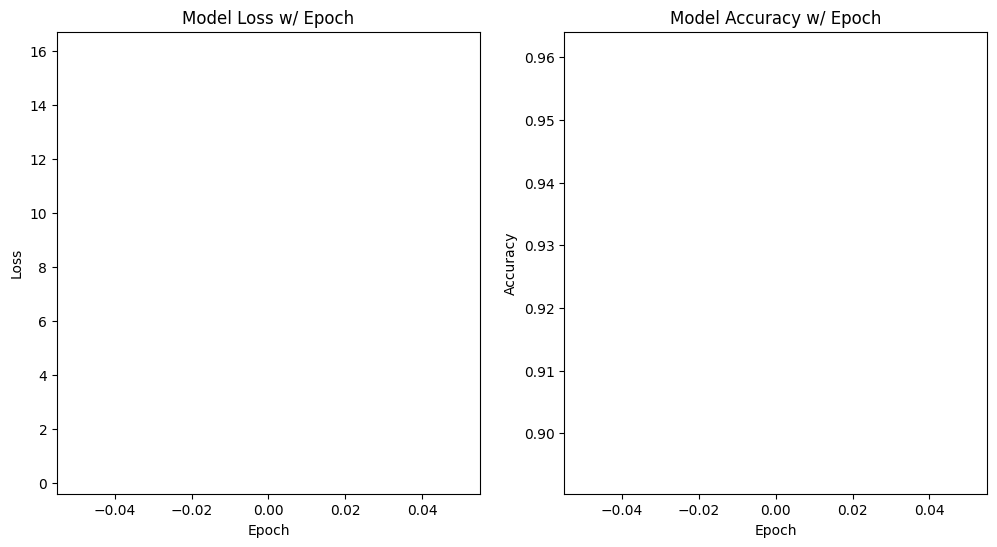

In [22]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss w/ Epoch')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy w/ Epoch')

plt.show()

## Model Saving

### Architecture Only

In [25]:
json_string = model.to_json()

In [26]:
with open('lenet.json', 'w') as f:
    f.write(json_string)

### Weight Only

In [27]:
model.save_weights('lenet_weight.h5')

### All Model

In [28]:
model.save('lenet_model.h5')

D:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
model.save('lenet_model.keras')

## Model Loading

### Architecture와 Weight 별도 저장한 경우

- Architecture Load + Weight Load + Compile

In [30]:
from tensorflow.keras.models import model_from_json

In [33]:
model_arch = ""

with open('lenet.json', 'r') as f:
    model_arch = f.read()

model2 = model_from_json(model_arch)

In [34]:
model2.load_weights('lenet_weight.h5')

In [35]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [37]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 15.9240 - accuracy: 0.9607


[15.924031257629395, 0.9606999754905701]

### 전체 저장한 경우

In [39]:
from tensorflow.keras.models import load_model

In [41]:
model3 = load_model('lenet_model.keras')

In [42]:
model3.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 15.9240 - accuracy: 0.9607


[15.924031257629395, 0.9606999754905701]